# chap 1.3.1

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imageshow(img): 
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def nothing(x):
    pass

## python lists - array

In [3]:
x=[x for x in range(10)]

In [4]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## np.zero

In [5]:
h,w,c=256,128,3
img = np.zeros((h,w), np.uint8)
#img[2:4,2:4,0:3]=255

In [6]:
for i in range(h):
    for j in range(w):
        img[i,j]=(i+j)%256
img[int(h/2),:]=255
img[:,int(w/2)]=255

In [8]:
imageshow(img)

In [9]:
img.shape

(256, 128)

In [10]:
img1=img.copy()

In [11]:
x=[x for x in range(10)]

## Exercise

In [12]:
rmode = False
gmode = False
bmode = False
drawing = False
startx,starty = -1,-1
endx,endy = -1,-1
curx,cury = -1,-1

In [13]:
# mouse callback function
def draw_circle(event, x, y, flags, param):
    global startx, starty, endx, endy, curx, cury, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        startx, starty = x, y
        endx, endy = x, y
    elif event == cv2.EVENT_MOUSEMOVE: 
        if drawing == True:
            endx, endy = x, y
        else:
            curx, cury = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        endx, endy = x, y

In [14]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)
oimg = cv2.imread("./Image/beach-438500_1280.jpg", 1)
height=oimg.shape[0]
width=oimg.shape[1]
font = cv2.FONT_HERSHEY_SIMPLEX
startx,starty = -1,-1
while(1):
    #img = cv2.imread("mountain-03-1024x768.jpg", 1)
    img = oimg[:,:,:].copy();
    if startx != -1 and starty != -1 :
        cv2.rectangle(img, (startx, starty), (endx, endy), (0,255,0), 0)
    if bmode:    
        img[starty:endy+1, startx:endx+1, 0] = 0  
    if gmode:    
        img[starty:endy+1, startx:endx+1, 1] = 0  
    if rmode:    
        img[starty:endy+1,startx:endx+1,2] = 0  
        
    key = cv2.waitKey(1) & 0xFF
    if key == ord('r'):
        rmode = not rmode
    elif key == ord('g'):
        gmode = not gmode
    elif key == ord('b'):
        bmode = not bmode
    elif key == ord('p'):
        if cury+endy-starty-1<height and curx+endx-startx-1<width:
            clip = img[starty+1:endy,startx+1:endx,:]
            oimg[cury:cury+endy-starty-1, curx:curx+endx-startx-1,:] = clip                  
    elif key == ord('l'):
        oimg = cv2.imread("./Image/beach-438500_1280.jpg", 1)
    elif key == 27:
        break
        
    msg1 = "Chanel value set 0 - red:"+str(rmode)+" green:"+str(gmode)+" blue:"+str(bmode)  
    msg2 = "Current mouse position - ("+str(curx)+","+str(cury)+") - ("+str(startx)+","+str(starty)+") - ("+str(endx)+","+str(endy)+")"  
    cv2.putText(img, 'OpenCV Color Chanel Control', (10, 30), 
        font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    cv2.putText(img, msg1, (10, 60), 
        font, 0.5, (255,255,255), 1, cv2.LINE_AA)        
    cv2.putText(img, msg2, (10, 90), 
        font, 0.5, (255,255,255), 1, cv2.LINE_AA)        
    cv2.imshow('image', img)
cv2.destroyAllWindows()

In [15]:
msg = "red:"+str(rmode)+" green:"+str(gmode)+" blue:"+str(bmode)+"chanel"    

In [16]:
startx,starty=10,10
endx,endy=100,100
x,y=100,200
img = cv2.imread("./Image/beach-438500_1280.jpg", 1)
clip = img[starty:endy+1,startx:endx+1,:]
img[x:x+endy-starty+1, y:y+endx-startx+1,:] = clip          

In [17]:
imageshow(img)

In [18]:
imageshow(oimg)

In [19]:
height=oimg.shape[0]

In [20]:
height

853

## Making Borders for image

In [22]:
BLUE = [0,0,255]
#img1 = cv2.imread('./Image/opencv_logo.png')
img1 = cv2.imread('./Image/raspberry-pi-4.png')

In [23]:
img1.shape

(604, 650, 3)

In [24]:
m=300
replicate = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REPLICATE)

In [25]:
replicate.shape

(1204, 1250, 3)

In [26]:
reflect = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_CONSTANT,value=BLUE)

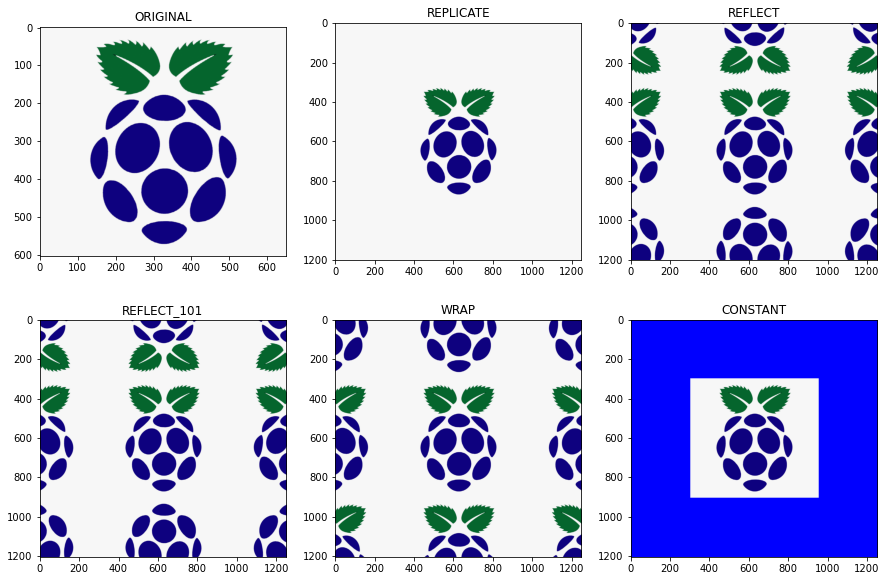

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

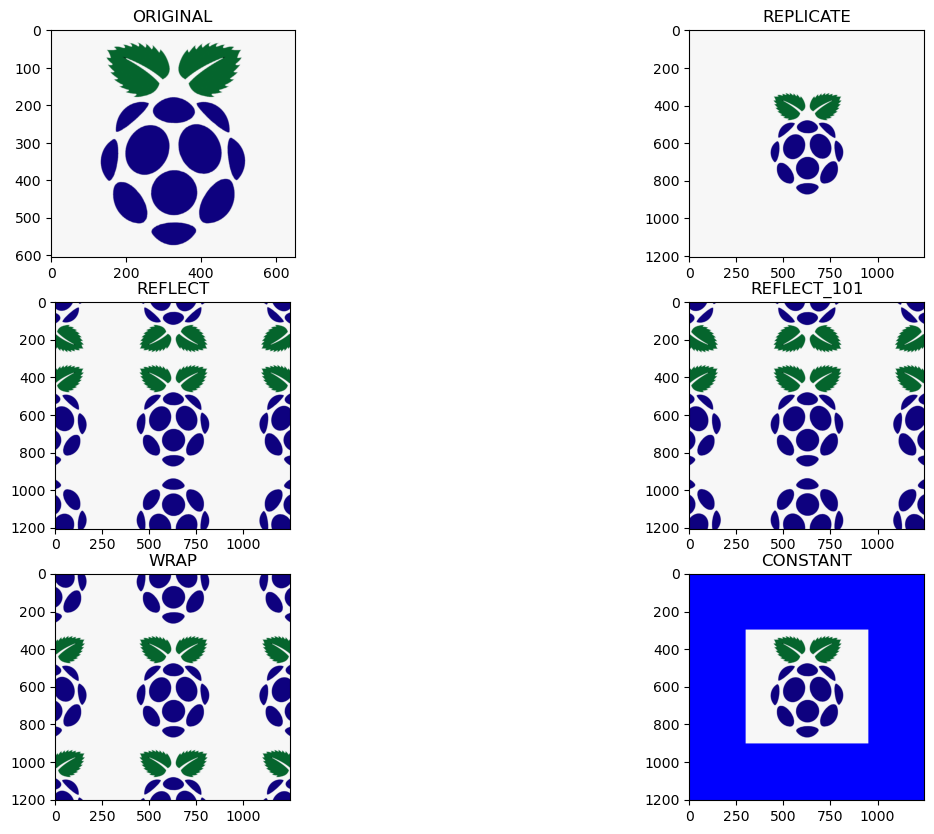

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(321),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(322),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(323),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(324),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(325),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(326),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

## addWeighted

In [29]:
img1 = cv2.imread('./Image/raspberry-pi-4.png')
img2 = cv2.imread('./Image/opencv_logo.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
cv2.namedWindow('image')
cv2.createTrackbar('alpha','image',0,255,nothing)
while(1):
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    alpha = cv2.getTrackbarPos('alpha','image')
    dst = cv2.addWeighted(img1,alpha/255.,img2,1.-alpha/255.,0)
cv2.destroyAllWindows()

## Measuring Performance with OpenCV

In [33]:
img1 = cv2.imread('./Image/beach-438500_1280.jpg')
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()

In [34]:
for i in range(5,49,2):
    print(i)

5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47


In [35]:
e1

2332482010780700

In [36]:
e2

2332483016185900

In [37]:
cv2.getTickFrequency()

1000000000.0

In [38]:
print(t)

1.0054052


In [39]:
imageshow(img1)

In [3]:
cv2.namedWindow('image')
cv2.createTrackbar('medianBlur','image',5,49,nothing)
img1 = cv2.imread('./Image/beach-438500_1280.jpg')
i=5
while(1):
    i = cv2.getTrackbarPos('medianBlur','image')
    i = int(i/2)*2+1;
    dst = cv2.medianBlur(img1,i)
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [4]:
4/2

2.0

In [5]:
int(4/2)+1

3

In [6]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]


In [7]:
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

## page 26

In [9]:
cap = cv2.VideoCapture('./Image/tracking2.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret :
        cv2.imshow('frame',frame)
    if cv2.waitKey(40) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## page 33

In [10]:
import cv2
import numpy as np
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()